# Midterm Examination: Part 1 

Due date: 15 March 2022 before 10 am.

Points: 15 for Part 1 (from 21 questions)

Do not alter this file.

Duplicate this file and move it into the Personal folder. Rename the file as Midterm_Part1_id (id is your student ID number, e.g. Midterm_Part1_6305001).

Write Python commands to answer each of the questions. For each question that requires numerical values (not list or dataframe), you also need to assign the variable e.g. ans1 to store the numerical answer for question 1. If there is more than 1 answer required, you must create more variables e.g. ans1_1, ans1_2 to store the values of the answers.

When you want to submit your file, you simply share access with me using my email pairote.sat@mahidol.edu and my TA p.pooy.pui.i@gmail.com. Do not move your file into the DS@MathMahidol team.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

pd.options.mode.chained_assignment = None

In [3]:
from plotnine import *

In [4]:
id = 6305007

## Population Dataset: 2020 Census Demographic Data by County.

We begin with the first dataset, which we obtained from 

https://www.dataemporium.com/dataset/254/?gclid=CjwKCAiAg6yRBhBNEiwAeVyL0Jl9xZg-nt9evBLB04fAZPc-TPTEmrW9kMfoIqMhBJvHjXQ-GV5fPBoChYIQAvD_BwE

This dataset was created from the 2020 Census. It contains one row per county with the total population and a breakdown by race.

In [5]:
path = '/Users/Kaemyuijang/SCMA248/Data/US_population.csv'

#df = pd.read_csv(path, parse_dates=True, index_col = 'date')

population = pd.read_csv(path)

#### Detailed description

This table breaks down the total population and population by race for each county in the United States, based on the 2020 Census.

**Some Terminology**.

* A city is created by any population that has its own system of government and a semblance of a legal system. Cities are located within a county, within a state. 

* A county is a geographic unit created for political purposes within a state.

Read more : Difference between city and county 
http://www.differencebetween.net/miscellaneous/difference-between-city-and-county/#ixzz7NKcARPB5

**This table only includes numbers for people who checked off a single race in the census**. This is the majority of people. You can see the number of people who belong to two or more races by subtracting POP_ONE_RACE from TOTAL_POPULATION. 

Before proceeding to the next step, make sure you understand the difference between POP_ONE_RACE from TOTAL_POPULATION.

In [6]:
population.columns= population.columns.str.lower()

population.head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other
0,CT,Fairfield County,957419,854584,584184,106756,4369,51341,347,107587
1,CT,Hartford County,899498,819125,554184,127194,3145,53844,328,80430
2,CT,Litchfield County,185186,172181,158774,3348,511,3486,67,5995
3,CT,Middlesex County,164245,152898,134715,8565,392,4987,50,4189
4,CT,New Haven County,864835,782472,543831,118933,4058,37520,470,77660


Q1: Verify that the sum of counts in the columns ['white','black','amarican_indian','asian','hawaiian','other'] is equal to the count in the column 'pop_one_race'.

In [7]:
population["sum"] = population[['white','black','amarican_indian','asian','hawaiian','other']].sum(axis=1)
population
ans1 = population['pop_one_race'].equals(population['sum'])
ans1

True

In [8]:
population.head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
0,CT,Fairfield County,957419,854584,584184,106756,4369,51341,347,107587,854584
1,CT,Hartford County,899498,819125,554184,127194,3145,53844,328,80430,819125
2,CT,Litchfield County,185186,172181,158774,3348,511,3486,67,5995,172181
3,CT,Middlesex County,164245,152898,134715,8565,392,4987,50,4189,152898
4,CT,New Haven County,864835,782472,543831,118933,4058,37520,470,77660,782472


Q2: How many counties are included in this dataset?

In [9]:
ans2 = population.county.size
ans2

3221

Q3: How many unique county names are there?

In [10]:
ans3 = population.county.unique().size
ans3

1956

Q4: What can be concluded from the difference between the number of counties and the number of unique county names?

In [11]:
population.shape

(3221, 11)

Q5: Create a table with the number of counties in each U.S. state.

In [12]:
population.groupby('state_abbr').size()

state_abbr
AK     30
AL     67
AR     75
AZ     15
CA     58
CO     64
CT      8
DC      1
DE      3
FL     67
GA    159
HI      5
IA     99
ID     44
IL    102
IN     92
KS    105
KY    120
LA     64
MA     14
MD     24
ME     16
MI     83
MN     87
MO    115
MS     82
MT     56
NC    100
ND     53
NE     93
NH     10
NJ     21
NM     33
NV     17
NY     62
OH     88
OK     77
OR     36
PA     67
PR     78
RI      5
SC     46
SD     66
TN     95
TX    254
UT     29
VA    133
VT     14
WA     39
WI     72
WV     55
WY     23
dtype: int64

Q6: The following Python command uses `np.random.seed(id)` to set the seed number of your student ID. Complete the following command to create the variable 'state_given', which stores a randomly selected US state.

In [13]:
np.random.seed(id)
states_given = np.random.choice(population.state_abbr.unique(), 1).tolist()
print(id)
print(states_given)

6305007
['OR']


Q7: List all counties in the randomly selected US state defined by `states_given`.

In [14]:
population.query('state_abbr == @states_given').head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
2694,OR,Baker County,16668,15635,14936,77,186,66,21,349,15635
2695,OR,Benton County,95184,86292,74612,1002,819,6428,292,3139,86292
2696,OR,Clackamas County,421401,380858,334855,4554,3510,20699,1117,16123,380858
2697,OR,Clatsop County,41072,37477,34525,226,431,564,104,1627,37477
2698,OR,Columbia County,52589,48007,45243,323,733,583,121,1004,48007


In [15]:
population.query('state_abbr == "NH"').head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
233,NH,Belknap County,63705,60615,59134,359,128,588,14,392,60615
234,NH,Carroll County,50107,48155,47199,134,111,359,9,343,48155
235,NH,Cheshire County,76458,72558,69907,708,169,1079,53,642,72558
236,NH,Coos County,31268,29925,28946,526,93,202,3,155,29925
237,NH,Grafton County,91118,86114,81268,819,222,2867,24,914,86114


In [16]:
# How to use loop variable inside pandas df.query()
# https://stackoverflow.com/questions/64828539/how-to-use-loop-variable-inside-pandas-df-query

states_list = ["TX","WI"]

#print(population.query('states_list == "AL"')[['county']])

for st in states_list:
    print(st)
    #print('states_list ==' + str(st))
       
    print(population.query('state_abbr ==@st')[['county']])

TX
               county
2440  Anderson County
2441   Andrews County
2442  Angelina County
2443   Aransas County
2444    Archer County
...               ...
2689      Wood County
2690    Yoakum County
2691     Young County
2692    Zapata County
2693    Zavala County

[254 rows x 1 columns]
WI
                county
3149      Adams County
3150    Ashland County
3151     Barron County
3152   Bayfield County
3153      Brown County
...                ...
3216   Waukesha County
3217    Waupaca County
3218   Waushara County
3219  Winnebago County
3220       Wood County

[72 rows x 1 columns]


In [17]:
population.state_abbr.unique()

array(['CT', 'MN', 'WY', 'NJ', 'ND', 'NV', 'MD', 'NH', 'ME', 'MT', 'MS',
       'OK', 'GA', 'KY', 'PA', 'SC', 'KS', 'CO', 'SD', 'NC', 'AK', 'UT',
       'OH', 'ID', 'LA', 'WV', 'MI', 'MO', 'AL', 'RI', 'DE', 'VT', 'MA',
       'VA', 'AR', 'NM', 'CA', 'AZ', 'TN', 'WA', 'PR', 'IL', 'TX', 'OR',
       'IA', 'HI', 'NE', 'NY', 'IN', 'DC', 'FL', 'WI'], dtype=object)

Q8: Write Python code to select two random US states and include them in a list named **states_list**. Do not forget to use np.random.seed to set the random value to your ID.

In [18]:
np.random.seed(id)
states_list = np.random.choice(population.state_abbr.unique(), 2, replace = True).tolist()
print(states_list)

['OR', 'WA']


Q9: List all counties for each state in the **states_list**.

In [20]:
for st in states_list:
    print(st)
    #print('states_list ==' + str(st))
       
    #print(population.query('state_abbr ==@st')[['county']])
    print(population.query('state_abbr ==@st'))

OR
     state_abbr             county  total_population  pop_one_race   white  \
2694         OR       Baker County             16668         15635   14936   
2695         OR      Benton County             95184         86292   74612   
2696         OR   Clackamas County            421401        380858  334855   
2697         OR     Clatsop County             41072         37477   34525   
2698         OR    Columbia County             52589         48007   45243   
2699         OR        Coos County             64929         59136   54930   
2700         OR       Crook County             24738         22722   21349   
2701         OR       Curry County             23446         21331   19925   
2702         OR   Deschutes County            198253        180993  169137   
2703         OR     Douglas County            111201        101896   96048   
2704         OR     Gilliam County              1995          1850    1770   
2705         OR       Grant County              7233         

#### Population by US states

Q10: Write Python code to create a table including the population for each U.S. state. The table should include total population, pop_one_race, white, black, etc. for each state.

In [21]:
population_state = population.groupby('state_abbr').sum()

In [22]:
population_state.head()

,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
state_abbr,,,,,,,,,
AK,733391,643867,435392,21898,111575,44032,12698,18272,643867
AL,5024279,4767326,3220452,1296162,33625,76660,2984,137443,4767326
AR,3011524,2797949,2114512,453783,27177,51839,14533,136105,2797949
AZ,7151502,6154696,4322337,339150,319512,257430,16397,899870,6154696
CA,39538223,33777988,16296122,2237044,631016,6085947,157263,8370596,33777988


Q11: From the table of population by race for each US state created above, write Python code to calculate the (row) percentages (for each US state) of the following variables 
**'white','black','amarican_indian','asian','hawaiian','other'**.

In [47]:
435392/733391

0.5936696796115578

In [54]:
races_list = ['white','black','amarican_indian','asian','hawaiian','other']

#population_state[races_list] = population_state[races_list].apply(lambda x: x/x.sum(), axis=1)

#population_state.head()
q11 = population_state.apply(lambda x: 100*(x/population_state.total_population), axis=0)[races_list]
q11.head()

,white,black,amarican_indian,asian,hawaiian,other
state_abbr,,,,,,
AK,59.366968,2.985856,15.213576,6.003892,1.731409,2.491440
AL,64.097794,25.797970,0.669250,1.525791,0.059392,2.735577
AR,70.214018,15.068218,0.902433,1.721354,0.482580,4.519473
AZ,60.439569,4.742360,4.467761,3.599663,0.229281,12.582951
CA,41.216121,5.657928,1.595964,15.392566,0.397749,21.170896


Q12: List the first five states with the highest percentage of white Americans.

In [52]:
#population_state.sort_values(by = ['white'], ascending = False).head(5)
q11.sort_values(by = ['white'], ascending = False).head(5)

,white,black,amarican_indian,asian,hawaiian,other
state_abbr,,,,,,
ME,90.801397,1.890251,0.578775,1.233008,0.032517,0.714202
VT,89.841652,1.404808,0.355945,1.795897,0.028146,0.815921
WV,89.799556,3.669087,0.206610,0.842330,0.026537,0.720237
NH,88.288740,1.461094,0.220032,2.604011,0.032885,1.749655
WY,84.662070,0.906993,2.409288,0.903526,0.100373,3.481488


Q13: List the first five states with the highest percentage of black Americans.

In [53]:
#population_state.sort_values(by = ['black'], ascending = False).head(5)
q11.sort_values(by = ['black'], ascending = False).head(5)

,white,black,amarican_indian,asian,hawaiian,other
state_abbr,,,,,,
DC,39.619459,41.449071,0.463059,4.864802,0.062650,5.408494
MS,56.019477,36.622047,0.555503,1.104557,0.038970,1.920116
LA,57.058623,31.431932,0.679662,1.855786,0.041028,3.063685
GA,51.862684,30.998334,0.472540,4.471920,0.068139,5.181701
MD,48.692973,29.470714,0.515523,6.814453,0.052564,6.652519


#### Visualization of U.S. population by race and U.S. states

In [27]:
popultion_melted = pd.melt(population_state[races_list+['state_abbr']], id_vars=['state_abbr'], value_vars=races_list).rename(columns={"value":"proportion","variable":"race"})

print(popultion_melted)

    state_abbr   race  proportion
0           AK  white    0.676214
1           AL  white    0.675526
2           AR  white    0.755736
3           AZ  white    0.702283
4           CA  white    0.482448
..         ...    ...         ...
307         VT  other    0.008658
308         WA  other    0.074708
309         WI  other    0.032896
310         WV  other    0.007560
311         WY  other    0.037652

[312 rows x 3 columns]


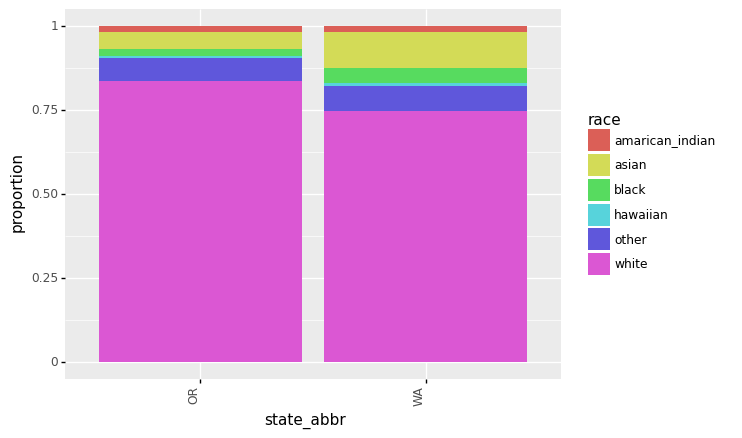

<ggplot: (309372941)>

In [28]:
(
ggplot(popultion_melted.query('state_abbr in @states_list')) 
    + aes(x = 'state_abbr', y = 'proportion',fill = 'race')
    + geom_col(position = "fill")
    + theme(axis_text_x=element_text(rotation=90, hjust=1)) 
    #+ facet_wrap('state_abbr')
)

Q14: Write Python to graph the US population by race broken down by state.

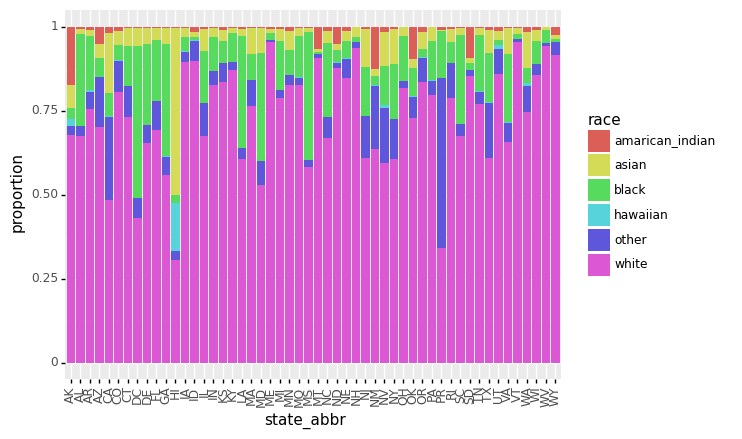

<ggplot: (309375445)>

In [29]:
(
ggplot(popultion_melted) 
    + aes(x = 'state_abbr', y = 'proportion',fill = 'race')
    + geom_col(position = "fill")
    + theme(axis_text_x=element_text(rotation=90, hjust=4)) 
)

## US Covid-19 Dataset

The second dataset can be downloaded from 

https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset.

Each data row contains data on cumulative coronavirus cases and deaths.

The specific data here, are the data **PER US COUNTY**.

We will work with this Covid-19 dataset by preprocessing data, performing statistical data analysis and presenting the results.

In [30]:
path = '/Users/Kaemyuijang/SCMA248/Data/us-counties.csv'

#df = pd.read_csv(path, parse_dates=True, index_col = 'date')

df = pd.read_csv(path, parse_dates=['date'], index_col = 'date')

#### Data Cleaning and Preparation: Handling Missing Values

In [31]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [32]:
df.query('state == "Nevada"').fips.unique()

array([32003., 32031., 32510., 32007.,    nan, 32023., 32005., 32019.,
       32013., 32033., 32001., 32021., 32015., 32017., 32029., 32027.,
       32011., 32009.])

In [33]:
#df.query('fips ==32510.').

In [34]:
df.shape

(2252245, 5)

Q15: List all variables (or columns) in this Covid-19 dataset with missing data.

In [35]:
# Find columns with missing data
# https://moonbooks.org/Articles/How-to-filter-missing-data-NAN-or-NULL-values-in-a-pandas-DataFrame-/

df.isnull().any()

county    False
state     False
fips       True
cases     False
deaths     True
dtype: bool

In [36]:
# Get a list of columns with missing data

df.columns[df.isnull().any()]

Index(['fips', 'deaths'], dtype='object')

Q16: Calculate the number of missing data for each variable (i.e. in each column).

In [37]:
# Get the number of missing data per column

df.isnull().sum()

county        0
state         0
fips      20955
cases         0
deaths    51599
dtype: int64

#### States with missing fips.

In [38]:
(df[df.fips.isnull()]).state.unique()

array(['New York', 'Rhode Island', 'New Jersey', 'Puerto Rico',
       'Virgin Islands', 'Guam', 'Maine', 'Massachusetts', 'Louisiana',
       'Kentucky', 'Nevada', 'Tennessee', 'Arkansas', 'Georgia',
       'Missouri', 'Minnesota', 'California', 'Colorado', 'Florida',
       'Hawaii', 'Illinois', 'Vermont', 'Arizona', 'Michigan', 'Texas',
       'Virginia', 'Washington', 'Utah', 'Idaho', 'Mississippi',
       'Northern Mariana Islands', 'Connecticut', 'Nebraska', 'Montana',
       'Pennsylvania', 'Indiana', 'Iowa', 'Maryland', 'Oklahoma',
       'West Virginia', 'Alaska', 'New Mexico', 'New Hampshire',
       'South Dakota', 'Kansas', 'Wyoming', 'Delaware', 'North Dakota',
       'Ohio', 'Wisconsin', 'South Carolina', 'Oregon', 'North Carolina',
       'American Samoa'], dtype=object)

#### Filtering out Missing Data

##### Droping out row with missing fips

Here is the list of observations with missing fips.

In [39]:
(df[df.fips.isnull()])

,county,state,fips,cases,deaths
date,,,,,
2020-03-01,New York City,New York,NaN,1,0.0
2020-03-01,Unknown,Rhode Island,NaN,2,0.0
2020-03-02,New York City,New York,NaN,1,0.0
2020-03-02,Unknown,Rhode Island,NaN,2,0.0
2020-03-03,New York City,New York,NaN,2,0.0
...,...,...,...,...,...
2022-02-25,Unknown,Puerto Rico,NaN,16665,4101.0
2022-02-25,Unknown,Rhode Island,NaN,29206,12.0
2022-02-25,Unknown,Tennessee,NaN,23465,557.0


Q16: Write Python code to drop rows only when the column 'fips' has NaN in it. How many rows are there in the resutling DataFrame.

In [40]:
print(df.dropna(subset=['fips']))

df.dropna(subset=['fips']).shape

                county       state     fips  cases  deaths
date                                                      
2020-01-21   Snohomish  Washington  53061.0      1     0.0
2020-01-22   Snohomish  Washington  53061.0      1     0.0
2020-01-23   Snohomish  Washington  53061.0      1     0.0
2020-01-24        Cook    Illinois  17031.0      1     0.0
2020-01-24   Snohomish  Washington  53061.0      1     0.0
...                ...         ...      ...    ...     ...
2022-02-25  Sweetwater     Wyoming  56037.0  10991   123.0
2022-02-25       Teton     Wyoming  56039.0   9767    16.0
2022-02-25       Uinta     Wyoming  56041.0   5616    36.0
2022-02-25    Washakie     Wyoming  56043.0   2336    43.0
2022-02-25      Weston     Wyoming  56045.0   1541    18.0

[2231290 rows x 5 columns]


(2231290, 5)

Now we can varify that we have successfully dropped rows with NaN values only in the fips column.

In [41]:
(df.dropna(subset=['fips'])).fips.isnull().sum()

0

Q18: How many NaN values remain in the **Deaths** column in the resutling DataFrame after deleting only rows where the  'fips' column contains NaN?

In [42]:
(df.dropna(subset=['fips'])).deaths.isnull().sum()

51599

In [43]:
df.shape

(2252245, 5)

#### List of obeservations with NA in both **fips** and **deaths** column.

We want to select only those rows from this DataFrame, where columns **fips** and **deaths** have NaN values i.e.

See Select Dataframe Rows with NaN in multiple columns

https://thispointer.com/pandas-select-rows-with-nan-in-column/


In [44]:
(df[df.fips.isnull() & df.deaths.isnull()])

,county,state,fips,cases,deaths
date,,,,,


Q19: Drop all rows with missing values in the deaths column

In [45]:
df.dropna(inplace=True)

In [46]:
df.shape

(2179691, 5)

In [47]:
population.head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
0,CT,Fairfield County,957419,854584,584184,106756,4369,51341,347,107587,854584
1,CT,Hartford County,899498,819125,554184,127194,3145,53844,328,80430,819125
2,CT,Litchfield County,185186,172181,158774,3348,511,3486,67,5995,172181
3,CT,Middlesex County,164245,152898,134715,8565,392,4987,50,4189,152898
4,CT,New Haven County,864835,782472,543831,118933,4058,37520,470,77660,782472


## Merging multiple DataFrames

The Covid-19 dataset contains only data on cumulative coronavirus cases and deaths. To perform our analysis, e.g., to compare infection rates among different U.S. states, we need to add more information on the population size of each county.

We will need to download another data frame that contains the list of state abbreviations. We will then combine multiple data frames by adding the 'total_population' to the Covid-19 dataset.

* List of State Abbreviations: 

https://worldpopulationreview.com/states/state-abbreviations

In [48]:
path = '/Users/Kaemyuijang/SCMA248/Data/us_state_abbreviations.csv'

abbr = pd.read_csv(path)

In [49]:
abbr.columns= abbr.columns.str.lower()

#abbr.rename(columns={"State":"state","Abbrev":"abbrev","Code":"code"}, inplace = True)

abbr.head()

,state,abbrev,code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [50]:
population.head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
0,CT,Fairfield County,957419,854584,584184,106756,4369,51341,347,107587,854584
1,CT,Hartford County,899498,819125,554184,127194,3145,53844,328,80430,819125
2,CT,Litchfield County,185186,172181,158774,3348,511,3486,67,5995,172181
3,CT,Middlesex County,164245,152898,134715,8565,392,4987,50,4189,152898
4,CT,New Haven County,864835,782472,543831,118933,4058,37520,470,77660,782472


In [51]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


Q20: Using the population and us_state_abbreviations datasets, write Python code to add the 'total_population' to the Covid-19 dataset.

In [52]:
df_index = df.index

In [53]:
df = pd.merge(df,abbr[['state','code']], how='left', on='state')
df.index = df_index

In [54]:
df.head()

,county,state,fips,cases,deaths,code
date,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-22,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-23,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-24,Cook,Illinois,17031.0,1,0.0,IL
2020-01-24,Snohomish,Washington,53061.0,1,0.0,WA


In [55]:
population.head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
0,CT,Fairfield County,957419,854584,584184,106756,4369,51341,347,107587,854584
1,CT,Hartford County,899498,819125,554184,127194,3145,53844,328,80430,819125
2,CT,Litchfield County,185186,172181,158774,3348,511,3486,67,5995,172181
3,CT,Middlesex County,164245,152898,134715,8565,392,4987,50,4189,152898
4,CT,New Haven County,864835,782472,543831,118933,4058,37520,470,77660,782472


#### Removing 'County' from the county names of the **population** data set.

In [56]:
# https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column
population['county'] = population['county'].map(lambda x: x.rstrip(' County'))

In [57]:
# The number of unique county names in population
population.county.unique().size

1932

In [58]:
# The number of unique county names in Covid-19 data
df.county.unique().size

1852

In [59]:
df.head()

,county,state,fips,cases,deaths,code
date,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-22,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-23,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-24,Cook,Illinois,17031.0,1,0.0,IL
2020-01-24,Snohomish,Washington,53061.0,1,0.0,WA


In [60]:
# df.drop(columns=['total_population_x','total_population_y'], inplace = True)

In [61]:
df.columns

Index(['county', 'state', 'fips', 'cases', 'deaths', 'code'], dtype='object')

In [62]:
print(df.shape)
df.head()

(2179691, 6)


,county,state,fips,cases,deaths,code
date,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-22,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-23,Snohomish,Washington,53061.0,1,0.0,WA
2020-01-24,Cook,Illinois,17031.0,1,0.0,IL
2020-01-24,Snohomish,Washington,53061.0,1,0.0,WA


In [63]:
population.head()

,state_abbr,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
0,CT,Fairfield,957419,854584,584184,106756,4369,51341,347,107587,854584
1,CT,Hartford,899498,819125,554184,127194,3145,53844,328,80430,819125
2,CT,Litchfield,185186,172181,158774,3348,511,3486,67,5995,172181
3,CT,Middlesex,164245,152898,134715,8565,392,4987,50,4189,152898
4,CT,New Have,864835,782472,543831,118933,4058,37520,470,77660,782472


In [64]:
# df = pd.merge(df,population[['county','code','total_population']], how='inner',on=['county','code'])

In [65]:
# df = pd.merge(df,population[['code','county','total_population']], how='left',left_on=['county','code'], right_on=['county','code'])

In [66]:
# df = pd.merge(df,population[['county','total_population']], how='left', on='county')

#### Merging two DataFrames

To add total population, rename the column **state_abbr** of the DataFrame population to **code** for merging 

In [67]:
#abbr.rename(columns={"State":"state","Abbrev":"abbrev","Code":"code"}, inplace = True)

population.rename(columns={"state_abbr":"code"}, inplace = True)

In [68]:
print(population.head())

print(df[['code','county']].head())

  code      county  total_population  pop_one_race   white   black  \
0   CT   Fairfield            957419        854584  584184  106756   
1   CT    Hartford            899498        819125  554184  127194   
2   CT  Litchfield            185186        172181  158774    3348   
3   CT   Middlesex            164245        152898  134715    8565   
4   CT    New Have            864835        782472  543831  118933   

   amarican_indian  asian  hawaiian   other     sum  
0             4369  51341       347  107587  854584  
1             3145  53844       328   80430  819125  
2              511   3486        67    5995  172181  
3              392   4987        50    4189  152898  
4             4058  37520       470   77660  782472  
           code     county
date                      
2020-01-21   WA  Snohomish
2020-01-22   WA  Snohomish
2020-01-23   WA  Snohomish
2020-01-24   IL       Cook
2020-01-24   WA  Snohomish


In [69]:
print(df.columns)
df.shape

Index(['county', 'state', 'fips', 'cases', 'deaths', 'code'], dtype='object')


(2179691, 6)

In [70]:
print(population.columns)
population.shape

Index(['code', 'county', 'total_population', 'pop_one_race', 'white', 'black',
       'amarican_indian', 'asian', 'hawaiian', 'other', 'sum'],
      dtype='object')


(3221, 11)

In [71]:
len(population.query('code == "CO"').county.unique())

64

In [72]:
len(df.query('code == "CO"').county.unique())

64

In [73]:
df.shape

(2179691, 6)

In [74]:
df['date'] = df.index

In [75]:
df.head()

,county,state,fips,cases,deaths,code,date
date,,,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0,WA,2020-01-21
2020-01-22,Snohomish,Washington,53061.0,1,0.0,WA,2020-01-22
2020-01-23,Snohomish,Washington,53061.0,1,0.0,WA,2020-01-23
2020-01-24,Cook,Illinois,17031.0,1,0.0,IL,2020-01-24
2020-01-24,Snohomish,Washington,53061.0,1,0.0,WA,2020-01-24


In [76]:
temp = pd.merge(df,population[['code','county','total_population']], how='left', on=['county','code'])

In [77]:
temp.shape

(2181095, 8)

In [78]:
temp.dropna(inplace = True)

In [79]:
temp.shape

(1312449, 8)

In [80]:
# pd.merge(df,population[['code','county','total_population']], how='left', on=['county','code'])

df_merged = pd.merge(df,population[['code','county','total_population']], how='inner', on=['county','code'])
#df.index = df_index

#### Answer when merging DataFrames

In [81]:
print(df_merged.head())

df_merged.isnull().sum()

      county       state     fips  cases  deaths code       date  \
0  Snohomish  Washington  53061.0      1     0.0   WA 2020-01-21   
1  Snohomish  Washington  53061.0      1     0.0   WA 2020-01-22   
2  Snohomish  Washington  53061.0      1     0.0   WA 2020-01-23   
3  Snohomish  Washington  53061.0      1     0.0   WA 2020-01-24   
4  Snohomish  Washington  53061.0      1     0.0   WA 2020-01-25   

   total_population  
0            827957  
1            827957  
2            827957  
3            827957  
4            827957  


county              0
state               0
fips                0
cases               0
deaths              0
code                0
date                0
total_population    0
dtype: int64

In [82]:
df_merged.shape

(1312449, 8)

In [83]:
df_merged.columns

Index(['county', 'state', 'fips', 'cases', 'deaths', 'code', 'date',
       'total_population'],
      dtype='object')

In [84]:
list(df_merged.columns.values)

['county',
 'state',
 'fips',
 'cases',
 'deaths',
 'code',
 'date',
 'total_population']

In [85]:
df_merged = df_merged[[ 'date','county', 'code','state', 'fips', 'cases', 'deaths','total_population']]

In [86]:
df_merged

,date,county,code,state,fips,cases,deaths,total_population
0,2020-01-21,Snohomish,WA,Washington,53061.0,1,0.0,827957
1,2020-01-22,Snohomish,WA,Washington,53061.0,1,0.0,827957
2,2020-01-23,Snohomish,WA,Washington,53061.0,1,0.0,827957
3,2020-01-24,Snohomish,WA,Washington,53061.0,1,0.0,827957
4,2020-01-25,Snohomish,WA,Washington,53061.0,1,0.0,827957
...,...,...,...,...,...,...,...,...
1312444,2022-02-21,Loving,TX,Texas,48301.0,157,0.0,64
1312445,2022-02-22,Loving,TX,Texas,48301.0,162,0.0,64
1312446,2022-02-23,Loving,TX,Texas,48301.0,163,0.0,64
1312447,2022-02-24,Loving,TX,Texas,48301.0,164,0.0,64


In [87]:
len(df_merged.county.unique())

1197

In [88]:
df_merged.code.unique()

array(['WA', 'IL', 'CA', 'AZ', 'MA', 'WI', 'TX', 'NE', 'UT', 'FL', 'NC',
       'NY', 'CO', 'NV', 'GA', 'KY', 'OK', 'PA', 'SC', 'DC', 'MO', 'NH',
       'OR', 'VA', 'CT', 'IN', 'MD', 'MN', 'NJ', 'IA', 'OH', 'MI', 'SD',
       'DE', 'NM', 'ND', 'AR', 'KS', 'TN', 'AL', 'ID', 'ME', 'MS', 'MT',
       'HI', 'VT', 'AK', 'WY', 'WV', 'RI'], dtype=object)

In [89]:
df_merged.fips.unique()

array([53061., 17031.,  6059., ..., 48269., 32009., 48301.])

In [145]:
# check

df_merged.query('state == "Alaska"').fips.unique()

array([2090., 2130., 2122., 2110., 2170., 2290., 2240., 2195., 2050.,
       2198., 2180., 2150., 2220., 2188., 2185., 2070., 2016., 2275.,
       2013., 2100., 2068., 2158.])

In [148]:
population.query('code == "NV"').county

192     Churchill
193         Clark
194       Douglas
195           Elk
196     Esmeralda
197        Eureka
198       Humbold
199        Lander
200        Lincol
201             L
202       Mineral
203           Nye
204      Pershing
205         Store
206        Washoe
207    White Pine
208     Carson Ci
Name: county, dtype: object

In [147]:
population.query('code == "AK"')

,code,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
1201,AK,Aleutians East Borough,3420,3212,684,297,802,771,32,626,3212
1202,AK,Aleutians West Census Area,5232,4858,1667,259,728,1513,239,452,4858
1203,AK,Anchorage Municipali,291247,250445,164446,14576,23661,27646,10001,10115,250445
1204,AK,Bethel Census Area,18666,17650,1665,85,15632,202,2,64,17650
1205,AK,Bristol Bay Borough,844,701,370,6,305,5,3,12,701
1206,AK,Chugach Census Area,7102,6342,4907,49,669,529,62,126,6342
1207,AK,Copper River Census Area,2617,2335,1611,8,663,17,10,26,2335
1208,AK,Denali Borough,1619,1480,1382,11,61,13,5,8,1480
1209,AK,Dillingham Census Area,4857,4361,799,25,3453,48,9,27,4361
1210,AK,Fairbanks North Star Borough,95655,83485,65971,4014,7555,3104,604,2237,83485


In [93]:
population.query('county =="District of Columbia"').head()

,code,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
3081,DC,District of Columbia,689545,633468,273194,285810,3193,33545,432,37294,633468


In [149]:
population.query('code == "NV" & county =="Carson Ci"').head()

,code,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
208,NV,Carson Ci,58639,51097,39852,1142,1459,1416,135,7093,51097


In [144]:
df_merged.query('state == "Alaska" & county == "Skagway Municipali"')

,date,county,code,state,fips,cases,deaths,total_population


In [96]:
df_merged.query('fips == 58639.').head()

,date,county,code,state,fips,cases,deaths,total_population


In [97]:
df_merged.query('state == "Maryland"').head(100)

,date,county,code,state,fips,cases,deaths,total_population
48069,2020-03-08,Harford,MD,Maryland,24025.0,1,0.0,260924
48070,2020-03-09,Harford,MD,Maryland,24025.0,1,0.0,260924
48071,2020-03-10,Harford,MD,Maryland,24025.0,1,0.0,260924
48072,2020-03-11,Harford,MD,Maryland,24025.0,1,0.0,260924
48073,2020-03-12,Harford,MD,Maryland,24025.0,1,0.0,260924
...,...,...,...,...,...,...,...,...
48164,2020-06-11,Harford,MD,Maryland,24025.0,993,57.0,260924
48165,2020-06-12,Harford,MD,Maryland,24025.0,994,58.0,260924
48166,2020-06-13,Harford,MD,Maryland,24025.0,1007,58.0,260924
48167,2020-06-14,Harford,MD,Maryland,24025.0,1012,58.0,260924


In [98]:
#population.columns
population.query('county == "Cook County"')

,code,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum


In [99]:
population.query('county == "Cook"')

,code,county,total_population,pop_one_race,white,black,amarican_indian,asian,hawaiian,other,sum
23,MN,Cook,5600,5269,4686,25,458,49,1,50,5269
510,GA,Cook,17229,16470,10975,4772,73,101,9,540,16470
2353,IL,Cook,5275541,4728989,2345983,1205824,56894,413271,1864,705153,4728989


In [100]:
df.query('county == "Galax city"')
#df.columns

,county,state,fips,cases,deaths,code,date
date,,,,,,,
2020-03-27,Galax city,Virginia,51640.0,1,0.0,VA,2020-03-27
2020-03-28,Galax city,Virginia,51640.0,1,0.0,VA,2020-03-28
2020-03-29,Galax city,Virginia,51640.0,1,0.0,VA,2020-03-29
2020-03-30,Galax city,Virginia,51640.0,1,0.0,VA,2020-03-30
2020-03-31,Galax city,Virginia,51640.0,1,0.0,VA,2020-03-31
...,...,...,...,...,...,...,...
2022-02-21,Galax city,Virginia,51640.0,2498,72.0,VA,2022-02-21
2022-02-22,Galax city,Virginia,51640.0,2499,72.0,VA,2022-02-22
2022-02-23,Galax city,Virginia,51640.0,2506,72.0,VA,2022-02-23


In [101]:
df_merged.query('state == "Virginia"').county.unique()

array(['Fairfax', 'Hanover', 'Prince Edward', 'Prince William',
       'Chesterfield', 'Spotsylvania', 'Stafford', 'York', 'Goochland',
       'Accomack', 'Gloucester', 'Albemarle', 'Mecklenburg', 'Bedford',
       'Culpeper', 'Fluvanna', 'Lee', 'Louisa', 'Rockingham',
       'Rockbridge', 'Halifax', 'Frederick', 'Mathews', 'Orange',
       'Roanoke', 'Shenandoah', 'Amelia', 'Fauquier', 'Greene',
       'King George', 'Pittsylvania', 'Prince George', 'Lancaster',
       'Northumberland', 'Greensville', 'Tazewell', 'Wythe',
       'King William', 'Smyth', 'Brunswick', 'Buckingham', 'Campbell',
       'Carroll', 'Clarke', 'Page', 'Augusta', 'Sussex', 'Cumberland',
       'Caroline', 'Pulaski', 'Richmond', 'Westmoreland', 'Wise',
       'Charlotte', 'Appomattox', 'Giles', 'Russell', 'Craig',
       'Dinwiddie', 'Lunenburg', 'Rappahannock', 'Floyd', 'Middlesex',
       'Essex', 'Patrick', 'Highland', 'Bland', 'Bath'], dtype=object)

In [102]:
df_merged.query('code == "CT"').head()

,date,county,code,state,fips,cases,deaths,total_population
45909,2020-03-08,Fairfield,CT,Connecticut,9001.0,1,0.0,957419
45910,2020-03-09,Fairfield,CT,Connecticut,9001.0,2,0.0,957419
45911,2020-03-10,Fairfield,CT,Connecticut,9001.0,2,0.0,957419
45912,2020-03-11,Fairfield,CT,Connecticut,9001.0,3,0.0,957419
45913,2020-03-12,Fairfield,CT,Connecticut,9001.0,5,0.0,957419


In [103]:
df_merged.to_csv('/Users/Kaemyuijang/SCMA248/Data/US_covid19_part2.csv')

In [104]:
path = '/Users/Kaemyuijang/SCMA248/Data/US_covid19_part2.csv'

final = pd.read_csv(path, parse_dates=True, index_col = 'date')

In [105]:
final.isnull().sum()

Unnamed: 0          0
county              0
code                0
state               0
fips                0
cases               0
deaths              0
total_population    0
dtype: int64

#### Working on the merged DataFrame

In [106]:
df = df_merged

In [107]:
df.set_index('date')

,county,code,state,fips,cases,deaths,total_population
date,,,,,,,
2020-01-21,Snohomish,WA,Washington,53061.0,1,0.0,827957
2020-01-22,Snohomish,WA,Washington,53061.0,1,0.0,827957
2020-01-23,Snohomish,WA,Washington,53061.0,1,0.0,827957
2020-01-24,Snohomish,WA,Washington,53061.0,1,0.0,827957
2020-01-25,Snohomish,WA,Washington,53061.0,1,0.0,827957
...,...,...,...,...,...,...,...
2022-02-21,Loving,TX,Texas,48301.0,157,0.0,64
2022-02-22,Loving,TX,Texas,48301.0,162,0.0,64
2022-02-23,Loving,TX,Texas,48301.0,163,0.0,64


Q: Write Python to check for NaN values after adding 'total_population' to the Covid-19 dataset.

In [108]:
df.isnull().sum()

date                0
county              0
code                0
state               0
fips                0
cases               0
deaths              0
total_population    0
dtype: int64

In [109]:
df.head()

,date,county,code,state,fips,cases,deaths,total_population
0,2020-01-21,Snohomish,WA,Washington,53061.0,1,0.0,827957
1,2020-01-22,Snohomish,WA,Washington,53061.0,1,0.0,827957
2,2020-01-23,Snohomish,WA,Washington,53061.0,1,0.0,827957
3,2020-01-24,Snohomish,WA,Washington,53061.0,1,0.0,827957
4,2020-01-25,Snohomish,WA,Washington,53061.0,1,0.0,827957


In [110]:
len(df.query('code == "CA"').county.unique())

35

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312449 entries, 0 to 1312448
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1312449 non-null  datetime64[ns]
 1   county            1312449 non-null  object        
 2   code              1312449 non-null  object        
 3   state             1312449 non-null  object        
 4   fips              1312449 non-null  float64       
 5   cases             1312449 non-null  int64         
 6   deaths            1312449 non-null  float64       
 7   total_population  1312449 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 90.1+ MB


In [112]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1312439, 1312440, 1312441, 1312442, 1312443, 1312444, 1312445,
            1312446, 1312447, 1312448],
           dtype='int64', length=1312449)

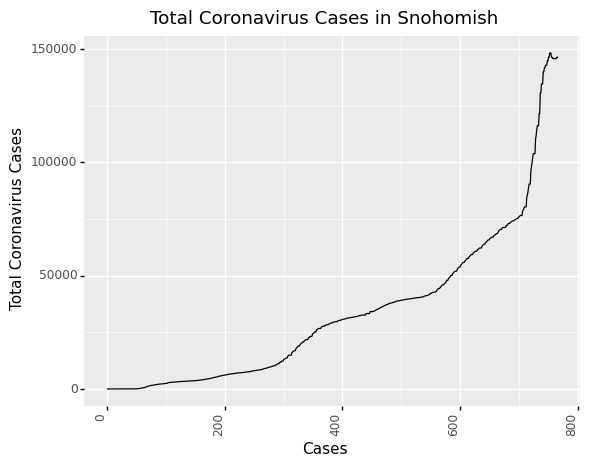

<ggplot: (311076877)>

In [113]:
df_Snohomish = df.query('county == "Snohomish"')


df_Snohomish['lag'] = df_Snohomish.cases.shift(1).fillna(0)
df_Snohomish['daily_cases'] = df_Snohomish.cases - df_Snohomish.lag

(
    ggplot(df_Snohomish) 
    + aes(x = df_Snohomish.index, y = 'cases') 
    + geom_line() 
    + theme(axis_text_x=element_text(rotation=90, hjust=1)) 
    + labs(x = "Cases", y = "Total Coronavirus Cases", title ="Total Coronavirus Cases in Snohomish")
)

#print(df_Snohomish.tail(10))

#df_Snohomish.query('daily_cases<0')

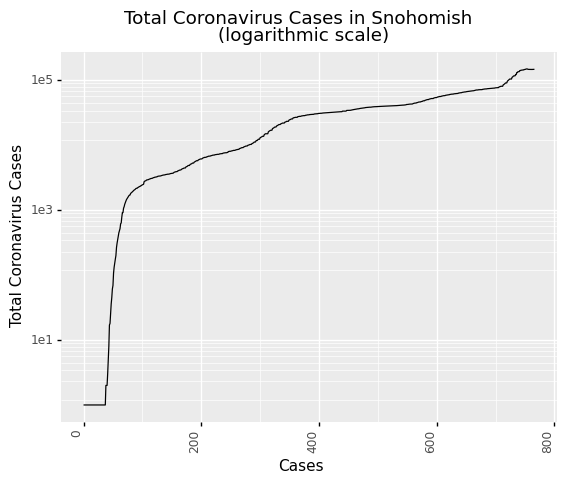

<ggplot: (298562257)>

In [114]:
(
    ggplot(df_Snohomish) 
    + aes(x = df_Snohomish.index, y = 'cases') 
    + geom_line() 
    + theme(axis_text_x=element_text(rotation=90, hjust=1)) 
    + labs(x = "Cases", y = "Total Coronavirus Cases", title ="Total Coronavirus Cases in Snohomish \n (logarithmic scale)")
    + scale_y_continuous(trans = "log10")
)


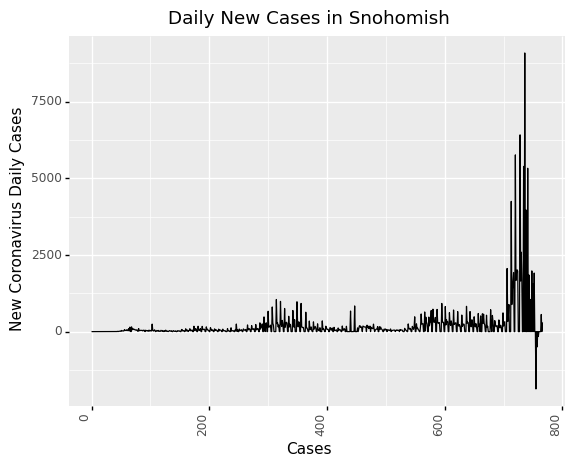

<ggplot: (311083657)>

In [115]:
(
    ggplot(df_Snohomish) 
    + aes(x = df_Snohomish.index, y = 'daily_cases') 
    + geom_line() 
    + theme(axis_text_x=element_text(rotation=90, hjust=1)) 
    + labs(x = "Cases", y = "New Coronavirus Daily Cases", title ="Daily New Cases in Snohomish")
)

In [116]:
df_Snohomish.daily_cases[df_Snohomish.daily_cases < 0]

67       -1.0
138      -1.0
755   -1870.0
757    -499.0
759    -159.0
Name: daily_cases, dtype: float64

In [117]:
df_Snohomish.loc['2022-02-01':'2022-02-18']

,date,county,code,state,fips,cases,deaths,total_population,lag,daily_cases


In [118]:
df.query('state=="Washington"').head(20)

,date,county,code,state,fips,cases,deaths,total_population
0,2020-01-21,Snohomish,WA,Washington,53061.0,1,0.0,827957
1,2020-01-22,Snohomish,WA,Washington,53061.0,1,0.0,827957
2,2020-01-23,Snohomish,WA,Washington,53061.0,1,0.0,827957
3,2020-01-24,Snohomish,WA,Washington,53061.0,1,0.0,827957
4,2020-01-25,Snohomish,WA,Washington,53061.0,1,0.0,827957
5,2020-01-26,Snohomish,WA,Washington,53061.0,1,0.0,827957
6,2020-01-27,Snohomish,WA,Washington,53061.0,1,0.0,827957
7,2020-01-28,Snohomish,WA,Washington,53061.0,1,0.0,827957
8,2020-01-29,Snohomish,WA,Washington,53061.0,1,0.0,827957
9,2020-01-30,Snohomish,WA,Washington,53061.0,1,0.0,827957


In [119]:
path = '/Users/Kaemyuijang/SCMA248/Data/us-counties.csv'

#df = pd.read_csv(path, parse_dates=True, index_col = 'date')

df = pd.read_csv(path, parse_dates=['date'])

In [120]:
df_Snohomish = df.query('county == "Snohomish"')

df_Snohomish['lag'] = df_Snohomish.cases.shift(1).fillna(0)
df_Snohomish['daily_cases'] = df_Snohomish.cases - df_Snohomish.lag

In [121]:
pd_merge = pd.merge(df,df_Snohomish, how = 'left', on = ['date','county'])

In [122]:
pd_merge.query('county == "Snohomish"')

,date,county,state_x,fips_x,cases_x,deaths_x,state_y,fips_y,cases_y,deaths_y,lag,daily_cases
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,0.0,1.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0,Washington,53061.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2239078,2022-02-21,Snohomish,Washington,53061.0,145694,1034.0,Washington,53061.0,145694.0,1034.0,145694.0,0.0
2242330,2022-02-22,Snohomish,Washington,53061.0,145694,1034.0,Washington,53061.0,145694.0,1034.0,145694.0,0.0
2245582,2022-02-23,Snohomish,Washington,53061.0,146253,1046.0,Washington,53061.0,146253.0,1046.0,145694.0,559.0
2248834,2022-02-24,Snohomish,Washington,53061.0,146253,1046.0,Washington,53061.0,146253.0,1046.0,146253.0,0.0


In [123]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv(path, parse_dates=['date'], index_col = 'date')

df = df.query('county in ["Snohomish","Cook"]')
#df = df.query('county in ["Snohomish"]')

In [125]:
df.loc['2022-02-01':'2022-02-18']

,county,state,fips,cases,deaths
date,,,,,
2022-02-01,Cook,Georgia,13075.0,4744,66.0
2022-02-01,Cook,Illinois,17031.0,1082395,13970.0
2022-02-01,Cook,Minnesota,27031.0,507,2.0
2022-02-01,Snohomish,Washington,53061.0,139881,948.0
2022-02-02,Cook,Georgia,13075.0,4764,66.0
...,...,...,...,...,...
2022-02-17,Snohomish,Washington,53061.0,145853,1018.0
2022-02-18,Cook,Georgia,13075.0,4855,68.0
2022-02-18,Cook,Illinois,17031.0,1105263,14439.0


In [126]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

pd.options.mode.chained_assignment = None


53061.0
17031.0
13075.0
27031.0


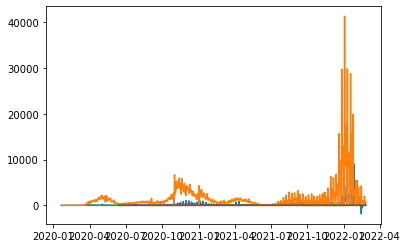

In [127]:
df_new = pd.DataFrame()

for id in df['fips'].unique():
    print(id)
    temp = df.query('fips == @id')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    #print(temp)
    
    plt.plot(temp.index,temp.daily_cases)
    #print(temp.query('county == @ct'))
    #df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)

53061.0
17031.0
13075.0
27031.0


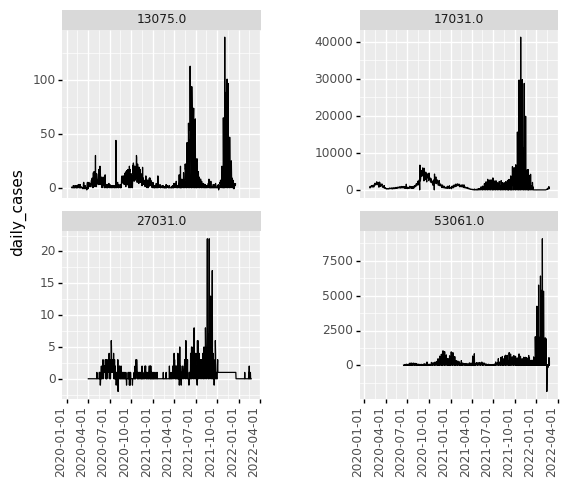

<ggplot: (310984517)>

In [128]:
# subplots_adjust ignores hspace, wspace #185
# https://github.com/has2k1/plotnine/issues/185

df_new = pd.DataFrame()

for id in df['fips'].unique():
    print(id)
    temp = df.query('fips == @id')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    
    rolling = temp.daily_cases.rolling(7, center=True)
    #print(rolling.mean().shape)
    #print(temp.shape)
    
    temp['rolling_mean'] = rolling.mean()
    #print(temp)
    
    df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)

(
    ggplot(df_new) + aes(x = df_new.index, y = 'daily_cases') + geom_line() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    #facet_grid('~fips', scales = "free_y")
    facet_wrap('fips', scales = "free_y") +
    theme(subplots_adjust={'wspace': 0.5,'hspace': 0.2})
)

In [129]:
df_new.loc[df_new['fips'] == 13075.]['2022-02-01':'2022-02-18']

,county,state,fips,cases,deaths,daily_cases,rolling_mean
date,,,,,,,
2022-02-01,Cook,Georgia,13075.0,4744,66.0,25.0,16.428571
2022-02-02,Cook,Georgia,13075.0,4764,66.0,20.0,16.428571
2022-02-03,Cook,Georgia,13075.0,4778,66.0,14.0,16.428571
2022-02-04,Cook,Georgia,13075.0,4787,66.0,9.0,13.285714
2022-02-05,Cook,Georgia,13075.0,4787,66.0,0.0,11.285714
2022-02-06,Cook,Georgia,13075.0,4787,66.0,0.0,9.142857
2022-02-07,Cook,Georgia,13075.0,4812,67.0,25.0,8.428571
2022-02-08,Cook,Georgia,13075.0,4823,67.0,11.0,8.142857
2022-02-09,Cook,Georgia,13075.0,4828,67.0,5.0,8.142857


/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


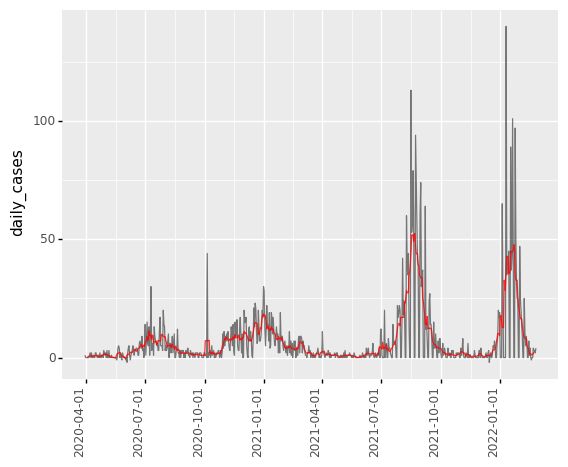

<ggplot: (314573565)>

In [130]:
#df_new13075 = df_new.loc[df_new['fips'] == 13075.]['2021-07-01':'2022-02-18']

df_new13075 = df_new.query('fips == 13075.')
#print(df_new13075.head(10))
(
    ggplot(df_new13075.query('fips == 13075.')) +
    geom_line(aes(x = df_new13075.index, y = 'daily_cases'), alpha = 0.5) +
    geom_line(aes(x = df_new13075.index, y = 'rolling_mean'), color='red',alpha=0.8) +
        theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)

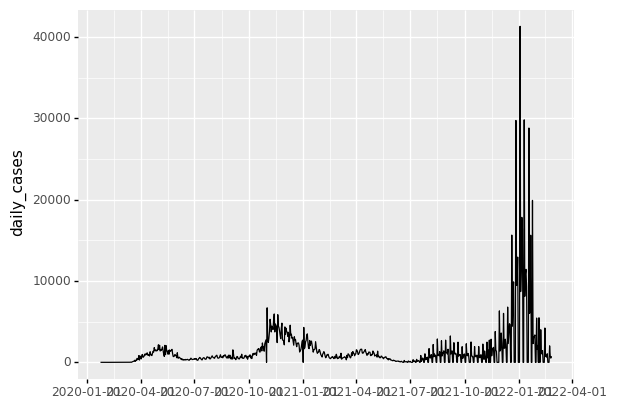

<ggplot: (314735525)>

In [131]:
df_new17031 = df_new.query('fips == 17031.')

ggplot(df_new17031.query('fips == 17031.')) + aes(x = df_new17031.index, y = 'daily_cases') + geom_line()

#### Query by state

In [132]:
df = pd.read_csv(path, parse_dates=['date'], index_col = 'date')

df = df.query('state in ["Washington"]')
#df = df.query('county in ["Snohomish"]')

print(df.county.unique())

['Snohomish' 'Spokane' 'King' 'Walla Walla' 'Chelan' 'Clark' 'Jefferson'
 'Pierce' 'Kittitas' 'Kitsap' 'Skagit' 'Whatcom' 'Island' 'Thurston'
 'Columbia' 'Grays Harbor' 'Yakima' 'Grant' 'Klickitat' 'Lewis' 'Lincoln'
 'Franklin' 'Mason' 'Benton' 'Clallam' 'Cowlitz' 'San Juan' 'Stevens'
 'Whitman' 'Adams' 'Douglas' 'Unknown' 'Ferry' 'Okanogan' 'Skamania'
 'Pend Oreille' 'Asotin' 'Wahkiakum' 'Pacific' 'Garfield']


In [133]:
df_new = pd.DataFrame()

for id in df['fips'].unique():
    print(id)
    temp = df.query('fips == @id')
    temp['lag'] = temp.cases.shift(1).fillna(0)
    temp['daily_cases'] = temp.cases - temp.lag
    temp.drop(columns=['lag'], inplace = True)
    
    rolling = temp.daily_cases.rolling(7, center=True)
    #print(rolling.mean().shape)
    #print(temp.shape)
    
    temp['rolling_mean'] = rolling.mean()
    #print(temp)
    
    df_new = pd.concat([df_new,temp])
    
    #print(temp)
    #df = pd.merge(df,temp, how = 'left', on =  ['date','county','state','fips','cases','deaths'])
    #df.drop(columns=['lag'], inplace = True)
    #print(df.columns)

53061.0
53063.0
53033.0
53071.0
53007.0
53011.0
53031.0
53053.0
53037.0
53035.0
53057.0
53073.0
53029.0
53067.0
53013.0
53027.0
53077.0
53025.0
53039.0
53041.0
53043.0
53021.0
53045.0
53005.0
53009.0
53015.0
53055.0
53065.0
53075.0
53001.0
53017.0
nan
53019.0
53047.0
53059.0
53051.0
53003.0
53069.0
53049.0
53023.0


In [134]:
df_new.county.unique()

array(['Snohomish', 'Spokane', 'King', 'Walla Walla', 'Chelan', 'Clark',
       'Jefferson', 'Pierce', 'Kittitas', 'Kitsap', 'Skagit', 'Whatcom',
       'Island', 'Thurston', 'Columbia', 'Grays Harbor', 'Yakima',
       'Grant', 'Klickitat', 'Lewis', 'Lincoln', 'Franklin', 'Mason',
       'Benton', 'Clallam', 'Cowlitz', 'San Juan', 'Stevens', 'Whitman',
       'Adams', 'Douglas', 'Ferry', 'Okanogan', 'Skamania',
       'Pend Oreille', 'Asotin', 'Wahkiakum', 'Pacific', 'Garfield'],
      dtype=object)

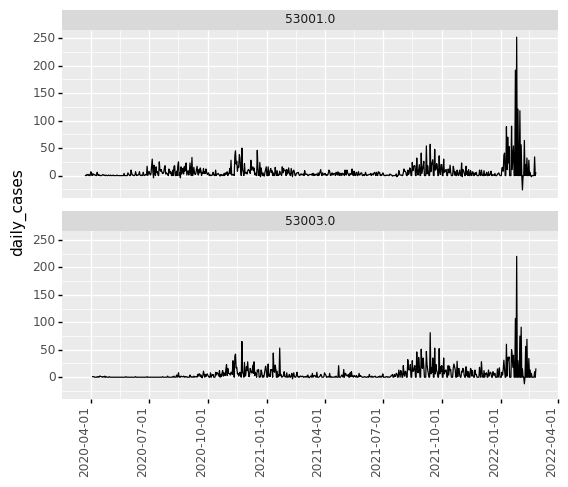

<ggplot: (328691209)>

In [135]:
fips_list = [53001., 53003.]

df_subset = df_new.query('fips in @fips_list')

(
    ggplot(df_subset) + aes(x = df_subset.index, y = 'daily_cases') + 
    geom_line() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
    facet_wrap('fips', nrow = 2, ncol = 1) +
    theme(subplots_adjust={'wspace': 0.5,'hspace': 0.2})
)

In [136]:
#(
#    ggplot(df_new) + aes(x = df_new.index, y = 'daily_cases') + geom_line() +    
#    theme(axis_text_x=element_text(rotation=90, hjust=1)) + 
#    facet_wrap('fips', nrow = 15, ncol = 3) +
#    theme(subplots_adjust={'wspace': 0.5,'hspace': 0.2})
#)

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


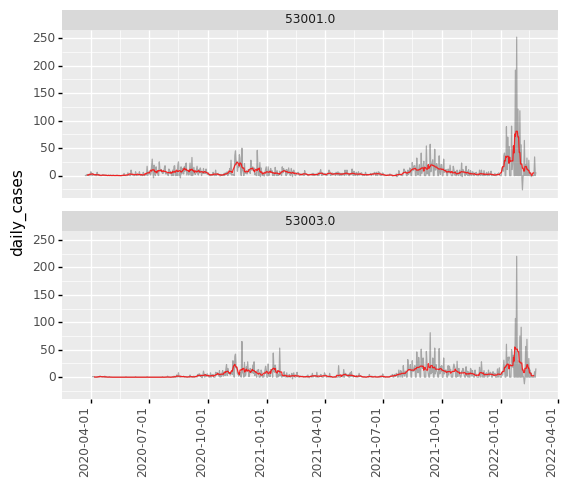

<ggplot: (298563541)>

In [137]:
df_subset = df_new.query('fips in @fips_list')

(
    ggplot(df_subset) + geom_line(aes(x = df_subset.index, y = 'daily_cases'), alpha = 0.3) +    
    geom_line(aes(x = df_subset.index, y = 'rolling_mean'),color='red', alpha = 0.8) +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +  
        facet_wrap('fips', nrow = 2, ncol = 1) +
    theme(subplots_adjust={'wspace': 0.5,'hspace': 0.2})
)

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.


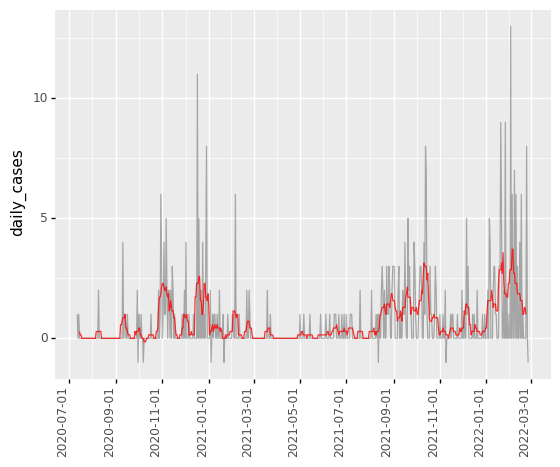

<ggplot: (309523373)>

In [138]:
fips_id = 53023.0

df_subset = df_new.query('fips==@fips_id')

(
    ggplot(df_subset) + geom_line(aes(x = df_subset.index, y = 'daily_cases'), alpha = 0.3) +    
    geom_line(aes(x = df_subset.index, y = 'rolling_mean'),color='red', alpha = 0.8) +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) 
)